In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import mglearn
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### 1.결정 트리 만들기

In [2]:
# mglearn.plots.plot_tree_progressive()

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 데이터 적재
cancer = load_breast_cancer()

# 훈련셋, 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

# 모델 선언
DTC = DecisionTreeClassifier(random_state=0)

# 모델 학습
DTC.fit(X_train, y_train)

# 모델 평가
print("train score : " , DTC.score(X_train, y_train))
print("test score : " , DTC.score(X_test, y_test), "\n")
# 과대 적합임을 알 수 있다.

# 모델 보정
# DTC2 = DecisionTreeClassifier(max_depth=4, random_state=0)
DTC2 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, random_state=0)
DTC2.fit(X_train, y_train)
print("DTC2 train score : " , DTC2.score(X_train, y_train))
print("DTC2 test score : " , DTC2.score(X_test, y_test), "\n")

train score :  1.0
test score :  0.8811188811188811 

DTC2 train score :  0.9647887323943662
DTC2 test score :  0.9370629370629371 



In [4]:
# from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
# import graphviz
# from sklearn.tree import export_graphviz


# export_graphviz(DTC2,
#                 out_file='tree.dot',
#                 class_names=['악성','양성'],
#                feature_names=cancer.feature_names,
#                impurity=False,
#                filled=True)

# with open('tree.dot', encoding = "utf-8") as f :
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))


In [5]:
importance = list(DTC2.feature_importances_)
# 사용하고 있는 feature만 나옴
# 어떤게 중요한지 회귀분석을 통해 파악할 수도 있지만, 이진분류이므로 적용이 안된다.
importance

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.8108414616561354,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05733052376079161,
 0.0,
 0.13182801458307294,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

<BarContainer object of 30 artists>

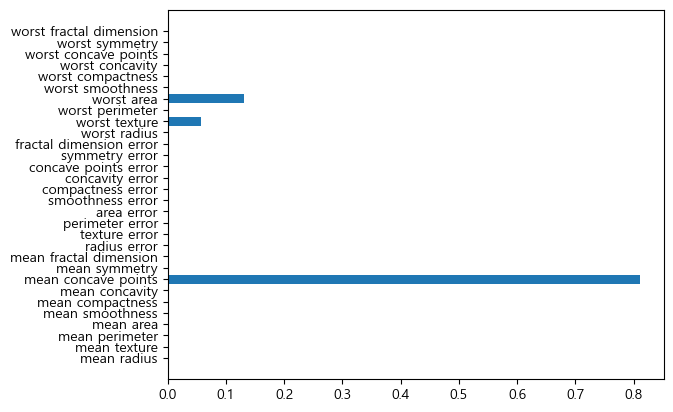

In [6]:
# cancer['feature_names']

plt.barh(cancer['feature_names'], importance)

In [7]:
# 회귀모델로 돌려보기

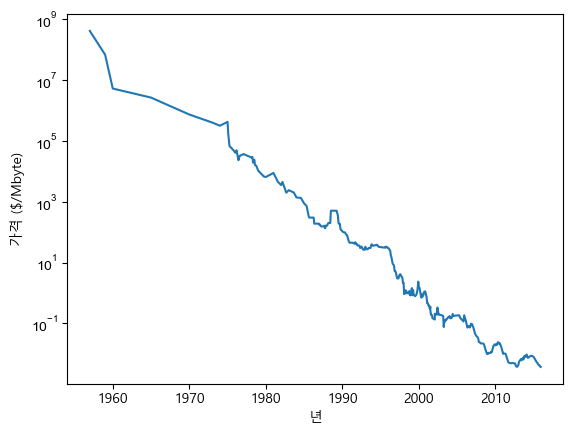

In [8]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")  # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")
plt.show() 

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

train = ram_prices[ram_prices['date'] < 2000].iloc[:,1:]
test = ram_prices[ram_prices['date'] >= 2000].iloc[:,1:]

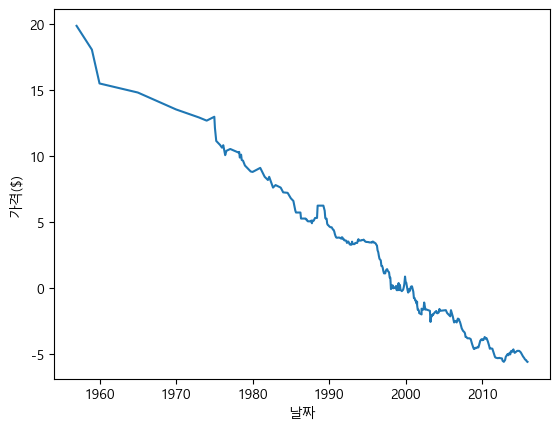

In [10]:
# X_train = train['date'].to_numpy()
X_train = train['date'].to_numpy()[:, np.newaxis] 
# 2차원 배열에 넣는 방법 : [:, np.newaxis]
# 왜 2차원에 넣어야할까?
y_train = train['price']

# data를 보면 선형성을 띄는 거 같지만, 실제론 그렇지 않다.
# 왜 그렇게 나타날까? 단위 scaling이 되어있지 않아서 마치 선형성을 띄는 거처럼 보이는 거다.
    # scaling 전! try!
# plt.plot(ram_prices['date'], ram_prices['price'])
# 그래프를 보면 마치 지수함수처럼 보인다. 
# 그렇다면 로그변환을 해주자!! 강제로 선형성을 띄게 해주는 과정이다.
    # scaling 후! try!
plt.plot(ram_prices['date'], ram_prices['price'].apply(lambda x : np.log(x)))
plt.xlabel("날짜")
plt.ylabel("가격($)")
plt.show()

y_train = train['price'].apply(lambda x : np.log(x))

In [11]:
# 정리하면
X_train = train['date'].to_numpy()[:, np.newaxis] 
y_train = train['price'].apply(lambda x : np.log(x))
X_test = test['date'].to_numpy()[:, np.newaxis] 
y_test = test['price'].apply(lambda x : np.log(x))


![image](https://user-images.githubusercontent.com/87592790/196871316-37239f7a-6c62-46a7-aa58-7edc39a8dd26.png)
  
훈련셋과 트리가 동알한 궤적을 가지고 있다. 엄청난 과대적합이라는 뜻이다. 
hyperparameter를 조정하지 않았을 경우, 과대적합이 많이 일어난다.



In [12]:
# 비교해보자
TreeModel = DecisionTreeRegressor(max_depth=5)
LinearModel = LinearRegression()

# 모델학습
TreeModel.fit(X_train, y_train)
LinearModel.fit(X_train, y_train)

X = ram_prices['date'].to_numpy()[:, np.newaxis]
y = ram_prices['date'].apply(lambda x : np.log(x))

# 테스트
pred_tree = TreeModel.predict(X)
pred_linear = LinearModel.predict(X)


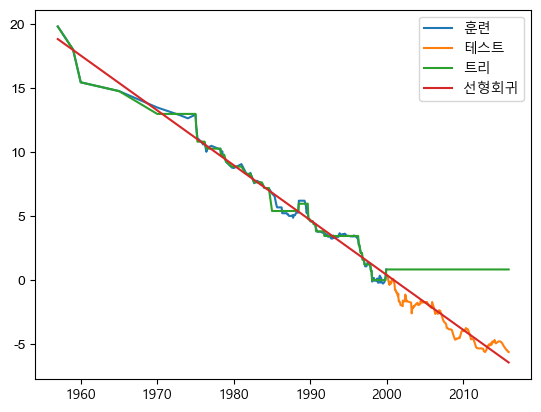

In [13]:
# 그랲프로 비교해보기
# hyperparameter 설정 안할 때
# max_depth=5 로 설정할 때
plt.yticks(fontname = "Arial") 
plt.plot(X_train, y_train, label='훈련')
plt.plot(X_test, y_test, label='테스트')
plt.plot(X, pred_tree, label = "트리")
plt.plot(X, pred_linear, label = "선형회귀")
plt.legend()
plt.show()

#### __Mushroom Classification__  
버섯으 특징을 보고 독버싯인지 아닌지 분류하는 자료
  
![image](https://user-images.githubusercontent.com/87592790/196872270-3e2b7fc2-bbea-4646-81ad-d8d80cc1dd91.png)  
e는 먹는 버섯, p는 독버섯 / cap_shape : 갓의 모양 / 
cap_surface : 갓의 표면  / bruises : 점박이  

In [14]:
mushroom = pd.read_csv("221020_mushrooms.csv", encoding = "utf-8")

# 1.데이터 확인하기
# mushroom.info()
mushroom.describe()
    # 데이터가 명목형 변수로 되어 있다는 것을 알 수 있음.
    # 확률적 모델을 사용하는 것이 더 낫다는 것을 알 수 있음.

# 2.인코딩하기
len(mushroom['cap-shape'].unique())# 값이 6개로 되어 있는 명목변수구나
mushroom['cap-shape'].unique()

    # 내가 한 풀이
def encode(series):
    old = list(series.unique())
    for x, n in enumerate(old):
        series = series.replace(n, x)
    return series

for name in list(mushroom.columns)[:]:
    put = mushroom[f'{name}']
    mushroom[f'{name}']= encode(put)
    
mushroom

    # 방법1
def asd(x,Value,NewValue):
    for ValueInput,NewValueInput in zip(Value,NewValue):
        if x == ValueInput:
            return NewValueInput
        else:
            pass

for i in mushroom.columns:
    dfValue = mushroom[i].unique()
    dfNewValue = range(len(mushroom[i].unique()))

    mushroom[i] = mushroom[i].apply(lambda x : asd(x,dfValue,dfNewValue))    
mushroom

    # 방법2(정답)
def encode(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

for i in mushroom.columns:
    mushroom[i] = encode(mushroom[i])
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [15]:
# 4.corr() 확인하자
mushroom.corrwith(mushroom['class']).sort_values()

odor                       -0.582015
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
stalk-root                 -0.337542
stalk-color-above-ring     -0.225294
habitat                    -0.191297
population                 -0.155254
cap-shape                  -0.112110
stalk-color-below-ring     -0.098476
cap-color                  -0.042028
stalk-shape                 0.102019
veil-color                  0.120766
gill-attachment             0.129200
ring-number                 0.152261
cap-surface                 0.169663
gill-spacing                0.348387
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
dtype: float64

In [16]:
# DecisionTree 모델에 넣어보기!!

y = mushroom['class']
del mushroom['veil-type']
# del mushroom['odor']
X = mushroom.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
decision.score(X_test, y_test)

1.0

In [27]:
# from sklearn.tree import export_graphviz


# export_graphviz(decision, out_file='mushroom_tree.dot',
#                 class_names = ['독','식용'],
#                 feature_names = X.columns,
#                 impurity = True,
#                 filled = True)

# import graphviz

# with open('mushroom_tree.dot', encoding='UTF8') as f :
#     dot_graph = f.read()
    
# display(graphviz.Source(dot_graph))

<BarContainer object of 21 artists>

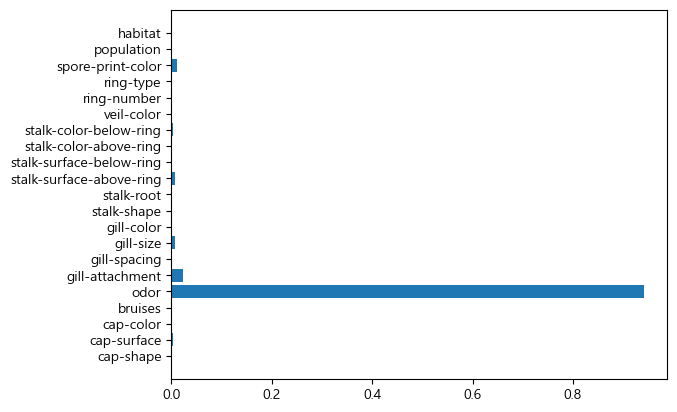

In [24]:
xlabel = X.columns
plt.barh(xlabel, decision.feature_importances_)